resources:

- get statevector: https://discuss.pennylane.ai/t/using-the-state-vector-directly/338/23 





In [1]:
!pip install pennylane-sf --upgrade
!pip install qutip
!pip install tensornetwork

Requirement already up-to-date: pennylane-sf in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [0]:
import tensorflow as tf
import pennylane as qml
from pennylane.qnodes import PassthruQNode

import numpy as np
import scipy as sp

import qutip as qt
from qutip import Bloch

In [0]:
dev = qml.device('default.qubit', wires=1)

def circuit(params, wires=0):
  qml.RX(params[0], wires=wires)
  qml.RY(params[1], wires=wires)

qnode = PassthruQNode(circuit, dev)

In [0]:
coeffs = [1, 1]
obs = [qml.PauliX(0), qml.PauliZ(0)]

H = qml.Hamiltonian(coeffs, obs)
qnodes = qml.map(circuit, obs, dev, measure='expval')
cost_fn  = qml.dot(coeffs, qnodes)

init_params = np.random.uniform(low=0, high=2*np.pi, size=2)

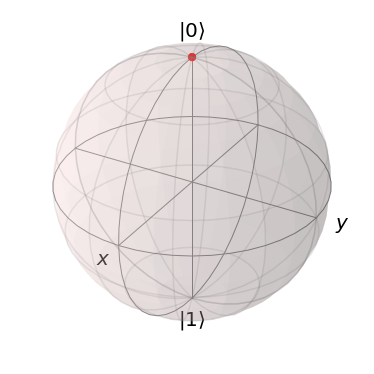

In [5]:
state_initial = dev._state

psi = state_initial
psi = psi/np.linalg.norm(psi)

# Convert to QObject in QuTiP
coords = [qt.Qobj(psi)]

# Settings for Bloch sphere visualization
pt_size = [50]*4
pt_marker = 'o'
pt_color = 'r'

bloch_plot = Bloch()
bloch_plot.point_marker = pt_marker
bloch_plot.point_color = pt_color
bloch_plot.point_size = pt_size

for coords in coords:
    bloch_plot.add_states(coords, 'point')

bloch_plot.show()

In [0]:
step_size = 0.01
max_iterations = 500
conv_tol = 1e-06
print_freq = 20

In [7]:
params = init_params
prev_energy = cost_fn(params)
qng_energies_block = []
all_states = []

for n in range(max_iterations):
    
    grad_cost = qml.grad(cost_fn, argnum=[0])
    grad_at_point = [float(i) for i in grad_cost(params)[0]] 
    
    params = params - step_size * np.dot(
                np.linalg.pinv(qnodes[0].metric_tensor([params])), 
                grad_at_point)

    energy = cost_fn(params)
    qng_energies_block.append(energy)
    
    conv = np.abs(energy - prev_energy)

    state_step = dev._state
    all_states.append(state_step)

    if n % print_freq == 0:
        print('Iteration = {:}'.format(n) ,'Energy = {:.8f} Ha,'.format(energy), 'Convergence parameter = {'
              ':.8f} Ha'.format(conv), )

    if conv <= conv_tol:
        qng_block_steps = n
        break

    prev_energy = energy

    state_final = dev._state

print()
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print()
print("State", state_final)
print()
print('Number of iterations = ', n)

Iteration = 0 Energy = 0.42451194 Ha, Convergence parameter = 0.07084643 Ha
Iteration = 20 Energy = -0.96148678 Ha, Convergence parameter = 0.04558010 Ha
Iteration = 40 Energy = -1.36221147 Ha, Convergence parameter = 0.00628291 Ha
Iteration = 60 Energy = -1.40905961 Ha, Convergence parameter = 0.00063521 Ha
Iteration = 80 Energy = -1.41371086 Ha, Convergence parameter = 0.00006208 Ha
Iteration = 100 Energy = -1.41416461 Ha, Convergence parameter = 0.00000605 Ha

Final value of the ground-state energy = -1.41420597 Ha

State [-5.49421906e-05-0.38107906j -2.26461409e-05+0.92454245j]

Number of iterations =  116


In [8]:
lst = all_states[::10]

for i in range(len(lst)):
  psi = lst[i]
  psi = psi/np.linalg.norm(psi)

  # Convert to QObject in QuTiP
  coords = [qt.Qobj(psi)]

  print(coords)

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.01343814+0.51853792j]
 [ 0.00815078+0.85491017j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.0156321 +0.26312338j]
 [ 0.00426401+0.96462611j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.01242391+0.01875804j]
 [ 0.00023311+0.99974683j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.00778079-0.15222905j]
 [-0.00119847+0.98831389j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.00444066-0.25394786j]
 [-0.00116593+0.96720701j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.00247135-0.31115897j]
 [-0.00080915+0.95035432j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.00137051-0.34291976j]
 [-0.00050031+0.93936356j]]]
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.000

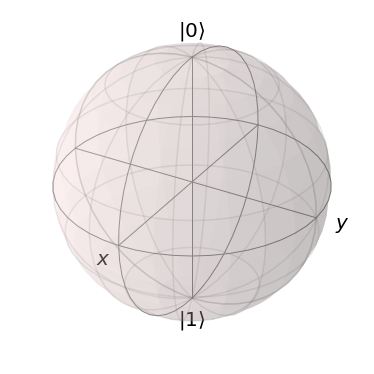

In [9]:
# Settings for Bloch sphere visualization
pt_size = [50]*4
pt_marker = 'o'
pt_color = 'r'

b = Bloch()
b.point_marker = pt_marker
b.point_color = pt_color
b.point_size = pt_size

# plot all the points
for coords in coords:
    bloch_plot.add_states(coords, 'point')

b.show()